In [95]:
import requests
import csv

# Replace with the actual Postman API endpoint
postman_api_url = "https://express-mongodb-survey-postapi.azurewebsites.net/fetch-all-audio"

# Replace with your Postman API key or authentication method
# headers = {
#     "X-Api-Key": "your_api_key",
#     "Content-Type": "application/json"
# }

# Make a request to retrieve data from Postman
response = requests.get(postman_api_url)

if response.status_code == 200:
    postman_data = response.json()

else:
    print("Failed to retrieve data from Postman.")


In [108]:
import csv
# Create a dictionary to store responses by agent_id, survey_id, category, and question
responses_dict = {}

for item in postman_data:
    agent_id = item['agent']
    survey_id = item['surveyId']
    category = item['category']
    question_number = item['questionNumber']
    audio_path = item['audioPath']

    if agent_id not in responses_dict:
        responses_dict[agent_id] = {}

    if survey_id not in responses_dict[agent_id]:
        responses_dict[agent_id][survey_id] = {}

    if category not in responses_dict[agent_id][survey_id]:
        responses_dict[agent_id][survey_id][category] = {}

    responses_dict[agent_id][survey_id][category][f'q{question_number}'] = audio_path

# Output CSV file
csv_filename = 'responses.csv'

with open(csv_filename, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write the header row
    header = ['agent_id', 'survey_id', 'category'] + [f'q{i}' for i in range(1, 33)]
    writer.writerow(header)

    # Write data rows
    for agent_id, agent_data in responses_dict.items():
        for survey_id, survey_data in agent_data.items():
            for category, category_data in survey_data.items():
                row = [agent_id, survey_id, category] + [category_data.get(f'q{i}', '') for i in range(1, 33)]
                writer.writerow(row)

print(f'CSV file "{csv_filename}" created successfully!')

CSV file "responses.csv" created successfully!


In [105]:
import csv
# Create a dictionary to store responses by agent_id, survey_id, and category
responses_by_agent_survey_category = {}

for item in postman_data:
    agent_id = item['agent']
    survey_id = item['surveyId']
    category = item['category']
    question_number = item['questionNumber']
    audio_path = item['audioPath']
    
    key = (agent_id, survey_id, category)
    
    if key not in responses_by_agent_survey_category:
        responses_by_agent_survey_category[key] = [''] * 32
    
    responses_by_agent_survey_category[key][question_number - 1] = audio_path

# Output CSV file
csv_filename = 'responses.csv'

with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ['agent_id', 'survey_id'] + [f'{category}:q{i}' for category in set(category for (_, _, category) in responses_by_agent_survey_category) for i in range(1, 33)]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for (agent_id, survey_id, category), responses in responses_by_agent_survey_category.items():
        row = {'agent_id': agent_id, 'survey_id': survey_id}
        row.update({f'{category}:q{i}': audio_path for i, audio_path in enumerate(responses, start=1)})
        writer.writerow(row)

print(f'CSV file "{csv_filename}" created successfully!')


CSV file "responses.csv" created successfully!


In [103]:
import csv
# Create a dictionary to store responses by survey_id
responses_by_survey = {}

for item in postman_data:
    survey_id = item['surveyId']
    agent_id = item['agent']
    question_number = item['questionNumber']
    audio_path = item['audioPath']
    
    if survey_id not in responses_by_survey:
        responses_by_survey[survey_id] = [''] * 32
    
    responses_by_survey[survey_id][question_number - 1] = audio_path

# Output CSV file
csv_filename = 'responses.csv'

with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ['survey_id','agent_id'] + [f'q{i}' for i in range(1, 33)]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for survey_id, responses in responses_by_survey.items():
        row = {'survey_id': survey_id}
        row.update({'agent_id': agent_id})
        row.update({f'q{i}': audio_path for i, audio_path in enumerate(responses, start=1)})
        writer.writerow(row)

print(f'CSV file "{csv_filename}" created successfully!')


CSV file "responses.csv" created successfully!


In [93]:
import pandas as pd
import base64
import soundfile as sf
import os
import json

# Open the JSON file in read mode
with open(r"C:\Users\D priyanka\Downloads\response.json", 'r') as json_file:
    # Load JSON data from the file
    data = json.load(json_file)

# Load the JSON data into a DataFrame
json_data = data  # Replace with your JSON data
df = pd.DataFrame(json_data)

# Create a directory to save audio files
audio_directory = "audio_files"
os.makedirs(audio_directory, exist_ok=True)

# Iterate through the DataFrame and process the data
for index, row in df.iterrows():
    # Extract audio data (assuming it's in the 'audioData' field)
    audio_data = row['audioData']
    
    # Decode the audio data if needed (e.g., if it's in base64 format)
    if isinstance(audio_data, str):
        audio_data = base64.b64decode(audio_data)
    
    # Save audio data to a WAV file
    audio_filename = os.path.join(audio_directory, f"audio_{index}.wav")
    sf.write(audio_filename, audio_data, 44100)  # Adjust the sample rate as needed
    
    # Extract and save text data to a CSV file (assuming it's in the 'textData' field)
    text_data = row['textData']
    text_filename = "text_data.csv"
    text_df = pd.DataFrame({'TextData': [text_data]})
    text_df.to_csv(text_filename, index=False)

print("Audio and text data processed and saved.")

IndexError: tuple index out of range

In [88]:
import json
import base64
import numpy as np
import soundfile as sf
import requests
import pandas as pd

# Set up the API request (replace with your Postman API details)
api_url = "https://express-mongodb-survey-postapi.azurewebsites.net/fetch-all-audio"

# Make a GET request to fetch the JSON data
response = requests.get(api_url)

if response.status_code == 200:
    # Load the JSON data
    json_data = response.json()

In [94]:
# Define a function to decode and save audio data
def save_audio(audio_data, filename):
#     audio_bytes = bytes(audio_data)
#     audio_array = np.frombuffer(audio_bytes, dtype=np.int16)
#     sf.write(filename, audio_array, 44100)  # You may need to adjust the sample rate
    decoded_blob = base64.b64decode(audio_data)
    output_wav_file = "output.wav"

# Open the WAV file in write mode
    with wave.open(output_wav_file, 'wb') as wav_file:
        # Set the WAV file parameters (1 channel, 16 bits per sample, 44100 Hz sample rate)
        wav_file.setnchannels(1)  # 1 channel (mono)
        wav_file.setsampwidth(2)   # 2 bytes (16 bits) per sample
        wav_file.setframerate(44100)  # 44100 samples per second

        # Write the decoded blob data to the WAV file
        wav_file.writeframes(decoded_blob)
# def save_audio(audio_data, filename):
#     # Decode base64 to obtain raw audio bytes
#     audio_bytes = base64.b64decode(audio_data)
    
#     # Convert raw bytes to a NumPy array of uint8 type
#     audio_array = np.frombuffer(audio_bytes, dtype=np.uint8)
    
#     # Write the audio data to a WAV file
#     sf.write(filename, audio_array, 44100)
# Extract and save the audio and text data
for item in data:
    audio_data = item["audioData"]["data"]
    text_data = item["agent"]  # Replace with the field that contains text data
    filename = f"{item['_id']}.wav"  # You can name the file as needed

    # Save the audio data to a WAV file
    save_audio(audio_data, filename)

    # Save the text data to a CSV or any other format as needed
    # Here, we'll print it to the console
    print(f"Text Data: {text_data}")

print("Audio and text data saved successfully.")


TypeError: argument should be a bytes-like object or ASCII string, not 'list'

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey_excel.csv")
df

,Questions,Name,Age,Gender,Location,Education,important Issues,support or oppose specific policies,opinion on economy & job creation
0,user1,Mahesh,22,Male,Aler,Btech,no issues,I oppose the tax reform,our government is lying in job creation
1,user2,Rekha,21,Female,adilabad,Btech,no issues,I support,no comments
2,user3,Santosh,25,Male,Hyderabad,10th pass,misuse of government facilities should be rest...,I totally support the policies regarding the h...,job creation is not only beneficial for indivi...
3,user4,Priyanka,27,Female,Khammam,Msc,Jobs for the needy,taxes on below poverty line,job creation must be increased
4,user5,Aaradhya,24,Female,Karimnagar,Bcom,concerns about quality of education and studen...,I support Healthcare Reform as it can improve ...,economics stability is crucial for Nations wel...
5,user 6,Roshan,28,Male,Aler,MBA,Corruption,oppose tax reform,Support for small buissiness
6,user 7,Sai,22,Male,Hyderabad,Btech,no issues,Support health reform,no comments
7,user 8,nikhil,26,Male,Nirmal,Btech,Corruption should be eradicated,I support but there should be some improvement...,"Job creation is good, but the economy is not a..."
8,user 9,shivani,22,Female,Peddapalli,Inter,Education Funding and quality,I support,I believe economy is strong
9,user 10,vasavi,35,Female,Kamareddy,Degree,Health care access and affordability,improvements needed,job creation is on rise


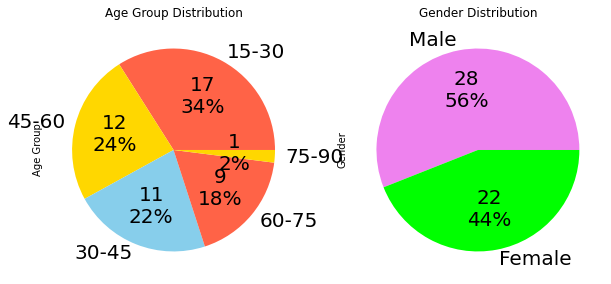

In [47]:
import matplotlib.pyplot as plt
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# Define age groups
age_bins = [15, 30, 45, 60, 75,90]  # Modify this to match your age groups
age_labels = ['15-30', '30-45', '45-60', '60-75','75-90']  # Labels for age groups
# Categorize ages into age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
# Group by age groups
age_group_counts = df['Age Group'].value_counts()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
# Pie chart for 'Age Group'
age_group_counts.plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                     colors=['tomato', 'gold', 'skyblue'], ax=ax1)
ax1.set_title('Age Group Distribution')
# Pie chart for 'Gender'
df['Gender'].value_counts().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['violet', 'lime'], ax=ax2)
ax2.set_title('Gender Distribution')
plt.show()

In [58]:
import plotly.express as px 
  
# Libraries for Sentiment Analysis 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 
import re, string
from string import digits

# transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax

# to avoid warnings 
import warnings 
warnings.filterwarnings('ignore') 

In [50]:
def clean(txt):
    #removing url & @ mentions
    proc_txt = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", txt)
    proc_txt = " ".join(proc_txt.split())
    #removing special chars
    proc_txt2 = re.sub(r"[^A-Za-z0-9]+"," ",proc_txt)
    proc_txt2 = " ".join(proc_txt2.split())
    # remove punctuations (residual if any)
    punct_en = set(string.punctuation)
    proc_txt2 = ''.join(char1 for char1 in proc_txt2 if char1 not in punct_en)
    # remove numericals (residual if any)
    num_digits = str.maketrans('','', digits)
    proc_txt2 = proc_txt2.translate(num_digits)
  # return the processed txt in lower case and without white spaces (if there are any)
    return proc_txt2.lower().strip()

In [56]:
# applying the function to 'Tweets' column to create a new 'cleaned' column
df['c1'] = df['important Issues'].apply(lambda x: clean(x))
df['c2'] = df['support or oppose specific policies'].apply(lambda x: clean(x))
df['c3'] = df['opinion on economy & job creation'].apply(lambda x: clean(x))
df.head()

,Questions,Name,Age,Gender,Location,Education,important Issues,support or oppose specific policies,opinion on economy & job creation,Age Group,c1,c2,c3
0,user1,Mahesh,22,Male,Aler,Btech,no issues,I oppose the tax reform,our government is lying in job creation,15-30,no issues,i oppose the tax reform,our government is lying in job creation
1,user2,Rekha,21,Female,adilabad,Btech,no issues,I support,no comments,15-30,no issues,i support,no comments
2,user3,Santosh,25,Male,Hyderabad,10th pass,misuse of government facilities should be rest...,I totally support the policies regarding the h...,job creation is not only beneficial for indivi...,15-30,misuse of government facilities should be rest...,i totally support the policies regarding the h...,job creation is not only beneficial for indivi...
3,user4,Priyanka,27,Female,Khammam,Msc,Jobs for the needy,taxes on below poverty line,job creation must be increased,15-30,jobs for the needy,taxes on below poverty line,job creation must be increased
4,user5,Aaradhya,24,Female,Karimnagar,Bcom,concerns about quality of education and studen...,I support Healthcare Reform as it can improve ...,economics stability is crucial for Nations wel...,15-30,concerns about quality of education and studen...,i support healthcare reform as it can improve ...,economics stability is crucial for nations wel...


In [59]:
# define the model name
model_name = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

# define the tokenizer for the model
tokenizer = AutoTokenizer.from_pretrained(model_name)

# define the configs for the model
config = AutoConfig.from_pretrained(model_name)

# get the pretrained model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [60]:
# custom function to get the sentiments
def get_sentiments(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    label = config.id2label[ranking[0]]
    return label

# apply the function to the 'cleaned tweet'
df['sentiments_c1'] = df['c1'].apply(lambda x: get_sentiments(x))
df['sentiments_c2'] = df['c2'].apply(lambda x: get_sentiments(x))
df['sentiments_c3'] = df['c3'].apply(lambda x: get_sentiments(x))
# view
df.head()

,Questions,Name,Age,Gender,Location,Education,important Issues,support or oppose specific policies,opinion on economy & job creation,Age Group,c1,c2,c3,sentiments_c1,sentiments_c2,sentiments_c3
0,user1,Mahesh,22,Male,Aler,Btech,no issues,I oppose the tax reform,our government is lying in job creation,15-30,no issues,i oppose the tax reform,our government is lying in job creation,neutral,negative,negative
1,user2,Rekha,21,Female,adilabad,Btech,no issues,I support,no comments,15-30,no issues,i support,no comments,neutral,positive,neutral
2,user3,Santosh,25,Male,Hyderabad,10th pass,misuse of government facilities should be rest...,I totally support the policies regarding the h...,job creation is not only beneficial for indivi...,15-30,misuse of government facilities should be rest...,i totally support the policies regarding the h...,job creation is not only beneficial for indivi...,negative,positive,positive
3,user4,Priyanka,27,Female,Khammam,Msc,Jobs for the needy,taxes on below poverty line,job creation must be increased,15-30,jobs for the needy,taxes on below poverty line,job creation must be increased,negative,neutral,neutral
4,user5,Aaradhya,24,Female,Karimnagar,Bcom,concerns about quality of education and studen...,I support Healthcare Reform as it can improve ...,economics stability is crucial for Nations wel...,15-30,concerns about quality of education and studen...,i support healthcare reform as it can improve ...,economics stability is crucial for nations wel...,neutral,positive,neutral


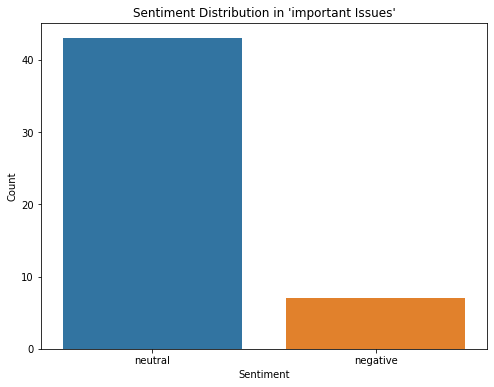

In [61]:
sentiment_counts = df['sentiments_c1'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution in 'important Issues'")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


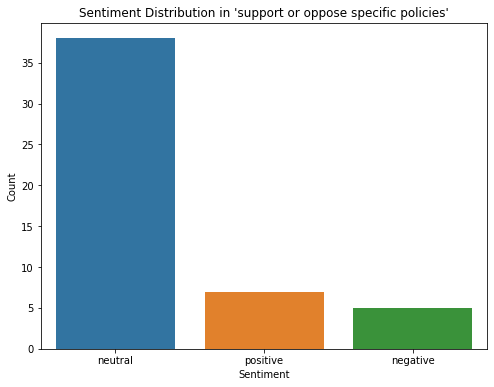

In [71]:
sentiment_counts = df['sentiments_c2'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution in 'support or oppose specific policies'")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

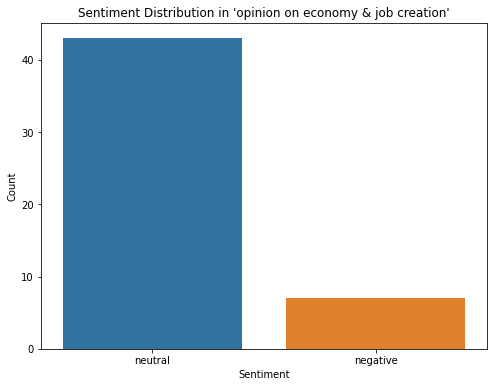

In [72]:
sentiment_counts = df['sentiments_c1'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution in 'opinion on economy & job creation'")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [68]:
print(f"{df['sentiments_c1'].value_counts()},{df['sentiments_c2'].value_counts()},{df['sentiments_c3'].value_counts()}")

neutral     43
negative     7
Name: sentiments_c1, dtype: int64,neutral     38
positive     7
negative     5
Name: sentiments_c2, dtype: int64,neutral     23
positive    22
negative     5
Name: sentiments_c3, dtype: int64


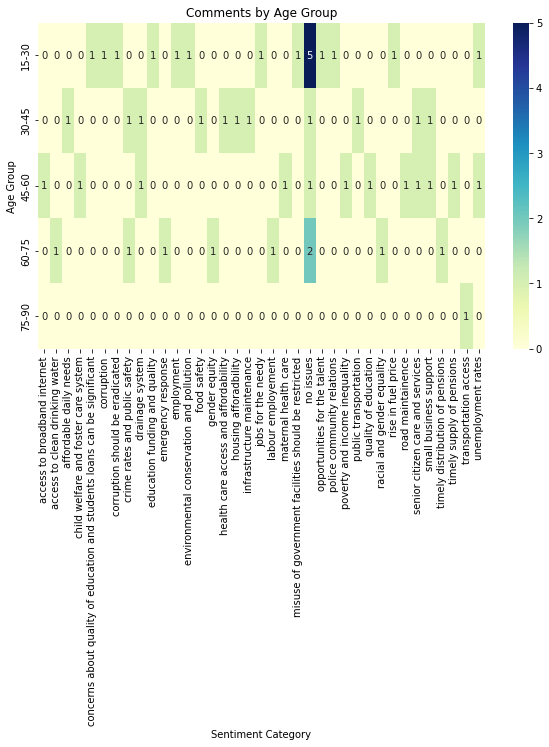

In [62]:
age_group_comments = df.groupby('Age Group')['c1'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(age_group_comments, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Comments by Age Group")
plt.xlabel("Sentiment Category")
plt.ylabel("Age Group")
plt.show()


<Axes: xlabel='sentiments_c1', ylabel='count'>

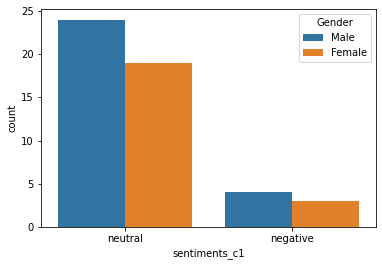

In [75]:
sns.countplot(x="sentiments_c1", hue = "Gender", data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Aler'),
  Text(1, 0, 'adilabad'),
  Text(2, 0, 'Hyderabad'),
  Text(3, 0, 'Khammam'),
  Text(4, 0, 'Karimnagar'),
  Text(5, 0, 'Nirmal'),
  Text(6, 0, 'Peddapalli'),
  Text(7, 0, 'Kamareddy'),
  Text(8, 0, 'Mancherial'),
  Text(9, 0, 'Nizamabad'),
  Text(10, 0, 'Bhupalpally'),
  Text(11, 0, 'Sircilla'),
  Text(12, 0, 'Siddipet'),
  Text(13, 0, 'Jangaon'),
  Text(14, 0, 'Mulugu'),
  Text(15, 0, 'Kothagudem'),
  Text(16, 0, 'Suryapet'),
  Text(17, 0, 'Nalgonda'),
  Text(18, 0, 'Bhuvanagiri'),
  Text(19, 0, 'Shamirpet'),
  Text(20, 0, 'Medchal'),
  Text(21, 0, 'Sangareddy'),
  Text(22, 0, 'Narayanpet'),
  Text(23, 0, 'Nagarkurnool'),
  Text(24, 0, 'Mahabubnagar'),
  Text(25, 0, 'Gadwal')])

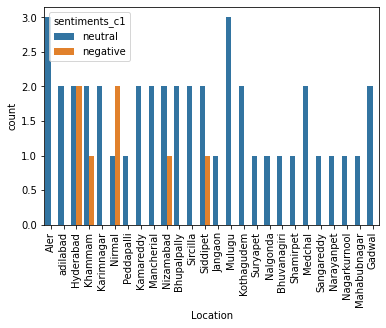

In [79]:
figsize=(20, 10)
sns.countplot(x="Location", hue = "sentiments_c1", data = df)
plt.xticks(rotation =90)